In [5]:
# https://sample-files.com/audio/wav/
# These samples are perfect for audio engineers, developers, and anyone working with high-fidelity sound.

<p style="font-family:consolas; font-size: 28px; color: magenta">Automated Music Genre Classification using Librosa and XGBOOST</p>

In [6]:
'''
 Music genre classification is a critical task in the field of music information retrieval, 
 which aims to categorize music tracks into predefined genres based on their audio features
'''

'\n Music genre classification is a critical task in the field of music information retrieval, \n which aims to categorize music tracks into predefined genres based on their audio features\n'

<p style="font-family:Roboto; font-size: 22px; color: magenta; text-decoration-line: overline; "> Part: _Understanding Music Genre Classification</p>

In [7]:
'''
Music genre classification involves analyzing audio signals to identify the genre of a given music track. 
This task can be approached using various machine learning and deep learning techniques
'''
'''
#Librosa is used in many cases:

Classification: To classify to which category the music belongs.
Speech Recognition: to identify a person's speech based on tone, pitch, frequency etc.
'''

"\n#Librosa is used in many cases:\n\nClassification: To classify to which category the music belongs.\nSpeech Recognition: to identify a person's speech based on tone, pitch, frequency etc.\n"

<p style="font-family:consolas; font-size: 28px; color: magenta">Key Features for Music Classification</p>

<p style="font-family:consolas; font-size: 18px; color: orange; text-decoration-line: overline; "> 1: _Chroma Features:</p>

<p style="font-family:consolas; font-size: 18px; color: orange; text-decoration-line: overline; "> 2: _Spectral Features:

<p style="font-family:consolas; font-size: 18px; color: orange; text-decoration-line: overline; "> 3: _Mel-Frequency Cepstral Coefficient:</p>

<p style="font-family:consolas; font-size: 18px; color: orange; text-decoration-line: overline; "> 4: _Tempo: </p>

<p style="font-family:consolas; font-size: 18px; color: orange; text-decoration-line: overline; "> 5: _Tonnetz:</p>

<p style="font-family:consolas; font-size: 18px; color: orange; text-decoration-line: overline; "> 6: _Harmonic-Percussive Source Separation (HPSS):</p>

<p style="font-family:consolas; font-size: 18px; color: orange; text-decoration-line: overline; "> 7: _Zero Crossing Rate: </p>

<p style="font-family:consolas; font-size: 18px; color: orange; text-decoration-line: overline; "> 8: _Root Mean S​quare En​ergy:</p>

<p style="font-family:Roboto; font-size: 22px; color: magenta; text-decoration-line: overline; "> Part: _Setting up the Dataset for Genre Classification:</p>

In [8]:
'''
 GTZAN Genre Classification dataset, which is widely used in academic research for music genre classification tasks. 
 The dataset consists of 1,000 audio tracks, each 30 seconds long, 
 categorized into 10 genres: Blues, Classical, Country, Disco, Hip-hop, Jazz, Metal, Pop, Reggae, and Rock.
'''
'''The audio files are in.wav format. There are 100 files in each folder'''

'The audio files are in.wav format. There are 100 files in each folder'

In [9]:
import zipfile
import os

# Assuming the uploaded zip file is present in the drive
zip_file_path = '../data/music.zip'

# Unzip the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall('../data/GTZAN')


# Specify the directory containing genre folders
data_dir = "../data/GTZAN/music"  # dataset path

# Get the list of genre folder names
genres = [f for f in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, f))]

# Print the genres to check
print("Genres found:", genres)

Genres found: ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']


<p style="font-family:consolas; font-size: 28px; color: orange">Building the Music Genre Classification Model</p>

<p style="font-family:Roboto; font-size: 22px; color: magenta; text-decoration-line: overline; "> Part: _Feature Extraction with Librosa From the Audio Files:</p>

In [10]:
'''
After installing and loading the dataset, we have will now extract features like MFCC, 
Chroma features, Spectrum features, Zero Crossing Rates, Tonnetz and Root Mean square Energy
'''

'\nAfter installing and loading the dataset, we have will now extract features like MFCC, \nChroma features, Spectrum features, Zero Crossing Rates, Tonnetz and Root Mean square Energy\n'

In [11]:
'''
#These features are concatenated and are further appended to list named 'X'. 
    The genre names are added to variable 'y' which is basically our label.
#The try-except block is used to handle errors if Librosa cannot process the file.
#Then these features are normalized using StandardScaler.
#The labels are converted to numeric labels using Label Encoder.
#The data has been divided in the ratio 80:20
'''
from sklearn.preprocessing import LabelEncoder, StandardScaler  # Import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split, cross_val_score  # Import cross_val_score
from xgboost import XGBClassifier, plot_importance
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import librosa
from sklearn.metrics import accuracy_score, classification_report

In [12]:

# Create lists to hold features and labels
X = []  # Keep as list
y = []  # Keep as list

In [13]:
# Iterate through each genre folder and each audio file inside the folder
for genre in genres:
    genre_dir = os.path.join(data_dir, genre)
    # Ensure it processes .wav files only
    audio_files = [f for f in os.listdir(genre_dir) if f.endswith('.wav')]  
    for file in audio_files:
        print(f"Processing audio file: {file} from genre: {genre}")
        file_path = os.path.join(genre_dir, file)
        try:
            # Load the audio file
            audio, sr = librosa.load(file_path, sr=None)
            
            # Extract MFCC features using librosa
            mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=13)
            mfccs_mean = np.mean(mfccs.T, axis=0)  # Get mean of MFCC features

            # Chroma features
            chroma = librosa.feature.chroma_stft(y=audio, sr=sr)
            chroma_mean = np.mean(chroma.T, axis=0)

            # Spectral Contrast
            spectral_contrast = librosa.feature.spectral_contrast(y=audio, sr=sr)
            spectral_contrast_mean = np.mean(spectral_contrast.T, axis=0)

            # Zero-Crossing Rate
            zcr = librosa.feature.zero_crossing_rate(y=audio)
            zcr_mean = np.mean(zcr.T, axis=0)

            # Root Mean Square Energy
            rmse = librosa.feature.rms(y=audio)
            rmse_mean = np.mean(rmse.T, axis=0)

            # Spectral Centroid
            spectral_centroid = librosa.feature.spectral_centroid(y=audio, sr=sr)
            spectral_centroid_mean = np.mean(spectral_centroid.T, axis=0)

            # Spectral Bandwidth
            spectral_bandwidth = librosa.feature.spectral_bandwidth(y=audio, sr=sr)
            spectral_bandwidth_mean = np.mean(spectral_bandwidth.T, axis=0)

            # Spectral Flatness
            spectral_flatness = librosa.feature.spectral_flatness(y=audio)
            spectral_flatness_mean = np.mean(spectral_flatness.T, axis=0)

            # Tonnetz
            tonnetz = librosa.feature.tonnetz(y=audio, sr=sr)
            tonnetz_mean = np.mean(tonnetz.T, axis=0)

            # Combine features into a single feature vector
            features = np.concatenate((
                mfccs_mean, chroma_mean, spectral_contrast_mean,
                zcr_mean, rmse_mean, spectral_centroid_mean,
                spectral_bandwidth_mean, spectral_flatness_mean,
                tonnetz_mean
            ))

            # Append features and corresponding label
            X.append(features)  # Append to list
            y.append(genre)     # Store the genre as the label
            
        except Exception as e:
            print(f"Error loading {file}: {e}")  # Catch and print any errors during file loading

Processing audio file: blues.00000.wav from genre: blues
Processing audio file: blues.00001.wav from genre: blues
Processing audio file: blues.00002.wav from genre: blues
Processing audio file: blues.00003.wav from genre: blues
Processing audio file: blues.00004.wav from genre: blues
Processing audio file: blues.00005.wav from genre: blues
Processing audio file: blues.00006.wav from genre: blues
Processing audio file: blues.00007.wav from genre: blues
Processing audio file: blues.00008.wav from genre: blues
Processing audio file: blues.00009.wav from genre: blues
Processing audio file: blues.00010.wav from genre: blues
Processing audio file: blues.00011.wav from genre: blues
Processing audio file: blues.00012.wav from genre: blues
Processing audio file: blues.00013.wav from genre: blues
Processing audio file: blues.00014.wav from genre: blues
Processing audio file: blues.00015.wav from genre: blues
Processing audio file: blues.00016.wav from genre: blues
Processing audio file: blues.00

C:\Users\38067\AppData\Local\Temp\ipykernel_9568\3321536029.py:11: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sr = librosa.load(file_path, sr=None)
c:\Users\38067\anaconda3\Lib\site-packages\librosa\core\audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


Processing audio file: jazz.00056.wav from genre: jazz
Processing audio file: jazz.00057.wav from genre: jazz
Processing audio file: jazz.00058.wav from genre: jazz
Processing audio file: jazz.00059.wav from genre: jazz
Processing audio file: jazz.00060.wav from genre: jazz
Processing audio file: jazz.00061.wav from genre: jazz
Processing audio file: jazz.00062.wav from genre: jazz
Processing audio file: jazz.00063.wav from genre: jazz
Processing audio file: jazz.00064.wav from genre: jazz
Processing audio file: jazz.00065.wav from genre: jazz
Processing audio file: jazz.00066.wav from genre: jazz
Processing audio file: jazz.00067.wav from genre: jazz
Processing audio file: jazz.00068.wav from genre: jazz
Processing audio file: jazz.00069.wav from genre: jazz
Processing audio file: jazz.00070.wav from genre: jazz
Processing audio file: jazz.00071.wav from genre: jazz
Processing audio file: jazz.00072.wav from genre: jazz
Processing audio file: jazz.00073.wav from genre: jazz
Processing

In [14]:
# Convert lists to numpy arrays after processing all files
X = np.array(X)  # Convert to numpy array
y = np.array(y)  # Convert to numpy array

# Check if X and y are populated correctly
print(f"Number of feature vectors: {len(X)}")
print(f"Number of labels: {len(y)}")


if len(X) > 0:
    print(f"Sample features: {X[0]}")
    print(f"Sample label: {y[0]}")

Number of feature vectors: 999
Number of labels: 999
Sample features: [-1.13598824e+02  1.21570671e+02 -1.91622620e+01  4.23639412e+01
 -6.36226606e+00  1.86219330e+01 -1.36997337e+01  1.53398018e+01
 -1.22743044e+01  1.09709454e+01 -8.32606125e+00  8.80208778e+00
 -3.66994071e+00  3.62242848e-01  3.67817044e-01  4.39834356e-01
  2.44691834e-01  2.47861981e-01  3.35616469e-01  3.64618748e-01
  4.35683727e-01  2.95985609e-01  3.15080315e-01  4.07008350e-01
  3.85100663e-01  1.59861156e+01  1.50982033e+01  1.84541494e+01
  1.83622426e+01  1.89174308e+01  1.71898162e+01  3.96550659e+01
  8.30448207e-02  1.30184323e-01  1.78412264e+03  2.00241241e+03
  4.49557370e-03  2.65477070e-02  1.82247619e-02  4.86466913e-03
 -1.66346409e-02  9.77707715e-03 -4.21312082e-03]
Sample label: blues


In [15]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the features using StandardScaler
scaler = StandardScaler() 
X_train = scaler.fit_transform(X_train)  # Fit to the training data and transform
X_test = scaler.transform(X_test)  # Only transform the test data

# Label encode the genre labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)  # Converts genre names to numeric labels
y_test_encoded = label_encoder.transform(y_test)

<p style="font-family:Roboto; font-size: 22px; color: magenta; text-decoration-line: overline; "> Part: _Using XGBoost for Genre Prediction:</p>

In [16]:
'''
#In this after processing the data, 
#we have fitted the data in our XGBoost model. 
#We have also used cross validation of five folds and calculated the mean validation score as well. 
#Then we have fed 20% of data for prediction of model. 
#Lastly we have converted our numeric labels back to original string values
'''

'\n#In this after processing the data, \n#we have fitted the data in our XGBoost model. \n#We have also used cross validation of five folds and calculated the mean validation score as well. \n#Then we have fed 20% of data for prediction of model. \n#Lastly we have converted our numeric labels back to original string values\n'

In [17]:
model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

# Perform cross-validation
cv_scores = cross_val_score(model, X_train, y_train_encoded, cv=5)  # Using 5-fold cross-validation
print(f'Cross-Validation Scores: {cv_scores}')
print(f'Mean Cross-Validation Score: {np.mean(cv_scores):.2f}')

# Fit the model on the full training set after cross-validation
model.fit(X_train, y_train_encoded)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Decode predictions back to genre names
y_pred_decoded = label_encoder.inverse_transform(y_pred)
y_test_decoded = label_encoder.inverse_transform(y_test_encoded)

c:\Users\38067\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:42:41] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\38067\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:42:44] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\38067\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:42:46] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\38067\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:42:49] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtr

Cross-Validation Scores: [0.63125    0.7        0.66875    0.6625     0.64150943]
Mean Cross-Validation Score: 0.66


c:\Users\38067\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:42:53] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


<p style="font-family:Roboto; font-size: 22px; color: magenta; text-decoration-line: overline; "> Part: _Evaluating the Model Performance:</p>

Accuracy: 0.69
              precision    recall  f1-score   support

       blues       0.65      0.81      0.72        21
   classical       0.71      1.00      0.83        12
     country       0.67      0.58      0.62        24
       disco       0.62      0.68      0.65        22
      hiphop       0.62      0.67      0.65        15
        jazz       0.87      0.74      0.80        27
       metal       0.79      0.83      0.81        18
         pop       0.76      0.84      0.80        19
      reggae       0.68      0.59      0.63        22
        rock       0.50      0.35      0.41        20

    accuracy                           0.69       200
   macro avg       0.69      0.71      0.69       200
weighted avg       0.69      0.69      0.69       200



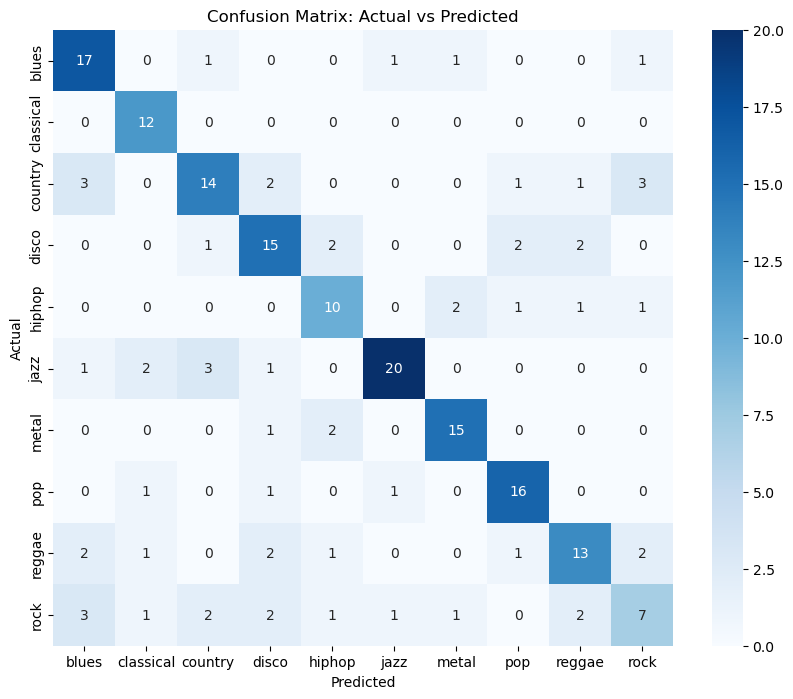

<Figure size 1200x1000 with 0 Axes>

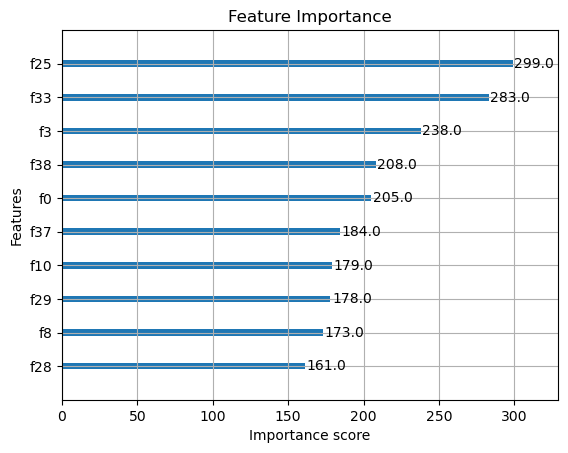

In [18]:
# Calculate accuracy
accuracy = accuracy_score(y_test_encoded, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Print classification report
print(classification_report(y_test_encoded, y_pred, target_names=label_encoder.classes_))

# Confusion Matrix Visualization
conf_matrix = confusion_matrix(y_test_encoded, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix: Actual vs Predicted')
plt.show()

# Plot Feature Importance
plt.figure(figsize=(12, 10))
plot_importance(model, max_num_features=10, importance_type='weight')  # Adjust max_num_features as needed
plt.title('Feature Importance')
plt.show()

In [ ]:
'''
The accuracy of our model is 69% which is pretty good especially for music genre classification. 
--> For hiphop and reggae we can see that there is slight dip in the metrics. 
--> For other genres like rock, reggae there is dip in recall which highlights the fact that False Negatives is more.
'''

'\nThe accuracy of our model is 72% which is pretty good especially for music genre classification. \n--> For hiphop and reggae we can see that there is slight dip in the metrics. \n--> For other genres like rock, reggae there is dip in recall which highlights the fact that False Negatives is more.\n'